In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [65]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root = './data', train = True, download = True, transform = transform)

dataloader = DataLoader(dataset = mnist_data, batch_size = 64, shuffle = True)

In [66]:
dataiter = iter(dataloader)
images,labels = dataiter.next()
images.shape

torch.Size([64, 1, 28, 28])

In [67]:
class Autoencoder(nn.Module):
    
    def __init__(self):
        super().__init__()
        # N, 784
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        ) # N, 3
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()  # all vals between 0 and 1
        )
        
    def forward(self, x):
                encoded = self.encoder(x)
                decoded = self.decoder(encoded)
                return decoded

In [68]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

In [69]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
    for (img, _) in dataloader:
        img = img.reshape(-1, 28*28)
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch: 1, Loss: 0.0488
Epoch: 2, Loss: 0.0409
Epoch: 3, Loss: 0.0443
Epoch: 4, Loss: 0.0357
Epoch: 5, Loss: 0.0419
Epoch: 6, Loss: 0.0400
Epoch: 7, Loss: 0.0383
Epoch: 8, Loss: 0.0379
Epoch: 9, Loss: 0.0319
Epoch: 10, Loss: 0.0362


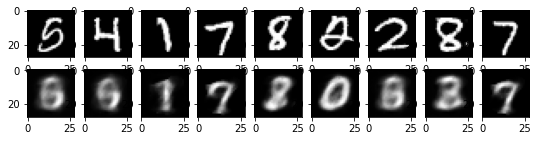

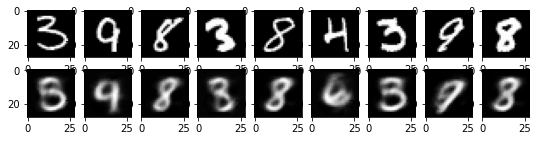

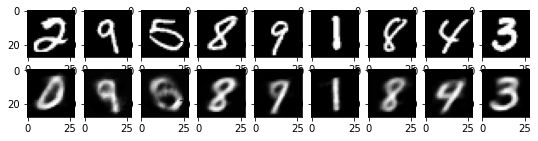

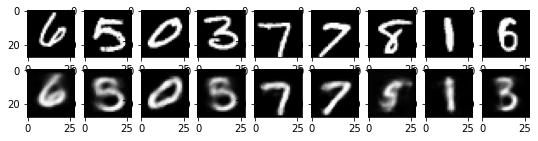

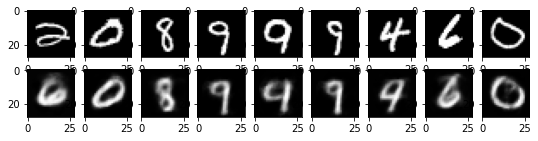

In [70]:
for k in range(0, num_epochs, 2):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    
    for i, item in enumerate(imgs):
        if i>=9: break
        plt.subplot(2,9, i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i>= 9: break
        plt.subplot(2,9, 9+i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

In [71]:
class Autoencoder_CNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        # N, 784
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride = 2, padding = 1), # N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride = 2, padding = 1), # N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7 , stride = 2, padding = 1), # N, 64, 1, 1
        ) 
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 6),  # N, 32, 7, 7 
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride =2, padding = 1, output_padding = 1),  # N, 16, 14, 14
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride =2, padding = 1, output_padding = 1),  # N, 1, 28, 28
            nn.Sigmoid()
        )
        
    def forward(self, x):
                encoded = self.encoder(x)
                decoded = self.decoder(encoded)
                return decoded

In [72]:
model = Autoencoder_CNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

In [74]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
    for (img, _) in dataloader:
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch: 1, Loss: 0.0072
Epoch: 2, Loss: 0.0042
Epoch: 3, Loss: 0.0032
Epoch: 4, Loss: 0.0029
Epoch: 5, Loss: 0.0034
Epoch: 6, Loss: 0.0023
Epoch: 7, Loss: 0.0026
Epoch: 8, Loss: 0.0023
Epoch: 9, Loss: 0.0021
Epoch: 10, Loss: 0.0020


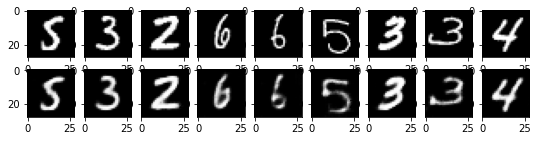

In [63]:
for k in range(0, num_epochs, 2):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    
    for i, item in enumerate(imgs):
        if i>=9: break
        plt.subplot(2,9, i+1)
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i>= 9: break
        plt.subplot(2,9, 9+i+1)
        plt.imshow(item[0])